## INTRODUCTION

This is a series of implementations of relevant models in Machine Learning. The implementation pipeline starts with a brief theoretical exposition of the model followed by a detailed implementation and associated discussion/analysis.

### 1.0 Threshold Logic Unit (TLU) and Perceptron Learning Rule

**1.1 Brief on Threshold Logic Unit:** The Threshold Logic Unit (TLU) is a basic form of machine learning model consisting of a single *input unit* (and corresponding weights), and an *activation function*. Note that the TLU is the most basic form of AI-neuron/computational unit, knowedge of which will lay the foundation for advanced topics in machine learning and deep learning. 
Each input $x_i$, is associated with a *weight* $w_i$, in which the sum of the weighted inputs (products of the input-weight $x_i\times w_i$) is computed to decide the activation, $a$:
                                    $$a = \sum_{i=1}^n x_iw_i$$

While the inputs remain unchange, the weights are randomly initialised and are adjusted through a training technique. For the TLU, the training process relies on a pair of examples -- $(x_i,y_i)$ corresponding to an arbitrary datapoint $(x_i)$ and its class $(y_i)$. This form of learning is referred to as *supervised learning* because both the data instance and the target are used in the learning process. Other forms of learning are *unsupervised* (utilises the input to infer relevant clusters or categories) and *reinforcement* (motivates and rewards the model for a correct prediction, hence the model is aimed at maximising reward), which I will not belabour here. The model is said to learn if it can correctly classify a previously unseen datapoint.

A threshold is defined $\theta$ (often user-defined) and the model produces an output if the threshold is exceeded, otherwise no output.
The final output or prediction is based on the sum of the weighted inputs. The TLU is based on mimicking the functionality of biological neuron at high-level. A typical neuron receives multitude of inputs from afferent neurons, each associated with weight. The weighted-inputs are modulated in the receiving neuron (efferent) and the neuron respond accordingly -- fires/produces a pulse (1) or no firing/no pulse (0).
This is achieved in the TLU via an activation function which takes the $a$ as input to generate a prediction $\hat{y}$, as follows: 
    $$\hat{y} = 1 \mbox{ if } a \geq \theta  \mbox{ otherwise } \hat{y} = 0$$

**Weights adjustments in the TLU:** From the perspective of a learning model datapoints belong to groups and there exist one or more decision surface(s) that demarcate the groups or classes. Thus, the goal of a learning model is to achieve a certain task such as classification of objects after the training regime. During training, the model identifies a set of parameters or free parameters (e.g. weights) to be used in conjunction with the input to achieve the desired goal by identifying the decision surface. It is crucial in any ML-based model to identify the free parameters, i.e. parameters to learn in helping the model to identify the decision surface.
The threshold, which was initially a scalar quantity is used as a baseline or *bias* (i.e., the baseline to attain before the neuron fires), is treated as a weight with a constant input of -1 ($x_iw_i >\theta$; after transformation $x_iw_i + (-1)\theta = 0 $) and integrated in the main stream of input-weight for model training. A learning rule is defined and repeatedly executed until the right setting of the parameter is obtained (at this stage the model is expected to correctly classify new examples). For each training epoch/regime, a marginal change is made to the weights. Adjustment to the weights vector is a function of the output of the given instance. On that basis, the parameters are adjusted - either increased or decreased according to the learning rule. 

**Some technical descriptions**

With the augmented threshold, the action of the TLU is either positve or negative given by: 
    $$ \mathbf{w.x} \geq 0 \longrightarrow y=1  \mbox{ or } \mathbf{w.x} < 0 \longrightarrow y=0 $$  

Because the input vector $\mathbf{x}$ is not affected during the training process, i.e. remains unchanged, only the weight vector $\mathbf{w}$ is adjusted to align properly with the input vector (see illustration). Using a learning rate $\alpha \mbox{ s.t. } 0<\alpha<1$, to control the process, a new vector $\mathbf{w'}$ is formed which is closer to the input vector $\mathbf{x}$. According to the decision rule, adjusting the weight can be based on addition or subtracting the weight vector; since both are likely, a learning rule that combines both is used instead. Thus,
    $$\mathbf{w'} =\mathbf{w} + \alpha\mathbf{x} \mbox{ or } \mathbf{w'}= \mathbf{w}-\alpha\mathbf{x}$$
A combine form is given by:
    $$\mathbf{w'} = \mathbf{w}+\alpha(\mathbf{t-y})\mathbf{x}$$
Where $t-y$ is used to decide the adjustment direction. The relationsip above can be expressed in a number of ways: (1) In terms of change in weight vector: 
    $$\delta \mathbf{w} =\mathbf{w'}-\mathbf{w}$  \mbox{ but } $\mathbf{w'} = \mathbf{w} + \alpha(\mathbf{t-y})\mathbf{v})$$
    $$\delta\mathbf{w} = \alpha(\mathbf{t-y})\mathbf{v})$$ 
(2) or its components: 
    $$\delta\mathbf{w_i} = \alpha(\mathbf{t_i-y_i})\mathbf{v_i}) \mbox{ where } $i = 1 to n+1$$

**I.2 TLU Implementation**

Having established the theoretical base and some running examples, the next step is to describe and implement the training phase of the model. **Perceptron Learning Rule:** The implementation here is based on the *perceptron training rule*, which is an advanced version of the TLU.
$\begin{verbatim}
repeat
    for each training vector pair (x,t)
        evaluate the output y when \mathbf{v} is input to the TLU
        if y \neq t then
            form a new weight vector \mathbf{w'} according to equation *
        else
            do nothing
        end if
    end for
 until  y = t \mbox{ for all vectors }
\end{verbatim}$

*Perceptron Convergence Theorem:* The use of perceptron learning rule is guaranteed to generate a valid weight vector that separates linearly separable pair of vector X, Y. More formally, the theorem states: 

*"If two classes of vector X,Y are linearly separable, then application of the perceptron training algorithm will eventually result in a weight vector $\mathbf{w_0}$ such that $\mathbf{w_0}$ define a TLU whose decision hyperplane separate X and Y"* -- Kevin Gurney, pp. 43.

Basically, the implementation is based on the following steps:
- identify inputs (and correct representation 0/1 or real values)
- identify the free parameters/learnable parameters
- specify/prescribe the learning rule -- optimisation
- adjust parameters
- test onvergence
- evaluate the model 

In [2]:
#IMPORT RELEVANT PACKAGES:
%matplotlib inline
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt

In [52]:
class TLU(object):
    """implementation of TLU"""
    
    def __init__(self, input_size):
        """this function initialises the parameters needed to operationalise the class object"""
        
        self.weights = np.zeros(input_size+1) # weights and the corresponding threshold/bias
        #self.epochs = epochs
        #self.lrate = lrate
        # if explict threshold value is given:
        #self.weights = np.insert(self.weights, 0, threshold) # if explicit threshold is to be used
        # FOR VISUALISATIONS:
        self.pred_error = [] # prediction error (y-axis)
        self.n_iter = [] #n_iter # number of iteration (x-axis)
        
    
    def activate_tlu(self, x):
        """an activation function that returns 1 or 0"""
        return 1 if x>= 0 else 0    
    
    def predict_tlu(self, row):
        """this function predicts individual row in a given dataset"""
        
        xw = np.array(row).dot(self.weights) # a  dot product of the row and weigth vectors
    
        a = self.activate_tlu(xw) # compute the activation using the 'activation' function ... 
        return a
            
        
    def train_tlu(self, data, targets, epochs, lrate):
        """training the model to identify the right setting for the weight vector"""
        
        for epoch in range(epochs): # training to adjust the weights:
            #print('Iteration: ', epoch)
            for row, t in zip(data, targets):
                row = np.insert(row, 0,-1) # insert the constant input (-1) for the bias
                
                pred = self.predict_tlu(row) # invoke the prediction function
                error = t - pred # prediction error!
                #update result for visualisation:
                self.pred_error.append(error)
                self.n_iter.append(epoch)
                ##SEE SOME OUTPUTS ... to check the actual results:#print('Actual: ',t, ' Predicted: ',pred)
                
                # adjust the weights vector ...
                if pred != t:
                    for r in range(len(self.weights)): # or: row.shape[0]
                        self.weights[r] = self.weights[r] + (lrate*error*row[r])
                else:
                    continue # do nothing and continue!

        return self.weights # learned weights for future prediction ... 
        
    def __str__(self): # print messages ... 
        #print('Actual: ',self.t, ' Predicted: ',self.pred)
        return('TLU Iteration!\n')
    
    # view result:
    def view_result(self):
        plt.scatter(self.n_iter, self.pred_error)
        plt.show()

    # a function to call instantiate training and prediction:

In [53]:
# a function to call instantiate training and prediction:
def tlu_prediction(model, data, targets, epochs, lrate=0.2, toPrint=True):
    # initialise the model to invoke relevant functions ...
    adj_w = model.train_tlu(data, targets, epochs, lrate) 
    
    if toPrint: # some visuals ... 
        print(model)# prints whatever is in the __str__()
        print('Main Targets: ',targets,'\n')
        print('Main Inputs: ',data,'\n')
        print('Adjusted weights: ', adj_w, '\n')
        
    return data, targets, adj_w

    #DATASET: Identify input and free parameters .... 
    
Irrespective of the task/problem to solve, the input needs to be transformed to real values or binary values. We consider basic input vectors given by $\mathbf{x_1} = [0 0 1 1]$ and $\mathbf{x_2} = [0 1 0 1]$ . The free parameter(s) is the weight vector and is randomly initialised to kickstart the learning process ... 

In [54]:
# LOGICAL AND DATA:
andData = np.array([[0,0],[0,1],[1,0],[1,1]])
andTargets = np.array([0,0,0,1])
# LGICAL OR DATA:
orData = np.array([[0,0],[0,1],[1,0],[1,1]])
orTargets = np.array([0,1,1,1])

    # invoke the function: 

In [55]:
model = TLU(input_size= 2)# class instantiation ...

In [56]:
#USING AND DATA:
#for i in range(5):
tlu_prediction(model, andData, andTargets, epochs=11,lrate=0.3)
#model.view_result()

TLU Iteration!

Main Targets:  [0 0 0 1] 

Main Inputs:  [[0 0]
 [0 1]
 [1 0]
 [1 1]] 

Adjusted weights:  [0.9 0.6 0.3] 



(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]), array([0, 0, 0, 1]), array([0.9, 0.6, 0.3]))

In [57]:
#USING OR DATA:
#for i in range(5):
tlu_prediction(model, orData, orTargets, epochs=11,lrate=0.3)
#model.view_result()

TLU Iteration!

Main Targets:  [0 1 1 1] 

Main Inputs:  [[0 0]
 [0 1]
 [1 0]
 [1 1]] 

Adjusted weights:  [0.6 0.6 0.6] 



(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]), array([0, 1, 1, 1]), array([0.6, 0.6, 0.6]))

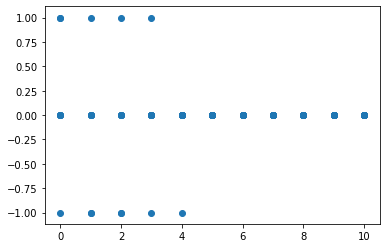

In [59]:
#sample visualisation:
model.view_result()

    #More Data:

In [ ]:
# read the file and name the columns:
df = pd.read_csv('data/sonar.all-data', names=['V'+str(i) for i in range(61)])
#rename the last column and binarize the entries:
df = df.rename(columns = {'V60':'Class'}) # rename the last column
df['Class'] = df.Class.apply(lambda x: 1 if x=='R' else 0)
#save file:
df.to_csv('data/sonar.all-data.csv', index_label=False)
df.head(3)

In [51]:
# full training is achieved using a stochastic gradient method ..

In [ ]:
# lets have a contrived data:
data = []
while len(data)<6:
    for j in range(9): # to index to column and slice entries ..
        l =[]
        for i in range(3): # to index columns ...
            l.extend([df.iloc[j,i]])
        data.append(l)
# append a random class to each data instance ... 
for r in data:
    r.extend([np.random.choice(2)]) # random values -- 0/1
# initialise a vector of random weights ... 
weights = np.random.rand(3)

In [ ]:
# remove the targets from the data:
[i.remove(i[-1]) for i in data]
data

In [58]:
########stop here ...

**ALTERNATE TRAINING**

    # ...these assume we have perfect/correct/right ettings for the weights to correctly classify a given linearly separable data. How do we get/obtai the set of the right weight vectors? This achived via an iterative process that utilises the input and initial set of parameter/free-metters -- such process is termed training/learning process which follows a prescribed instruction/set of rules ... 

In [ ]:
# The Delta rule is used to adjust the weight of a single-layer neural netork based on the gradient 
# descent algorithm ... it is more effective to 

### THE DELTA RULE
The *perceptron learning rule*, which was used to train the single-layer TLU, is not suitable for handling weights in multilayer network. The weights in TLU are somewhat directed to follow the solution trajectory.

Another important learning rule is commonly used to adjust weight vectors is *delta rule*. The *delta rule* is a function of the difference between the actual output from the network $\hat{y}$ and the corresponding target $t$ given by $e_i = (t_i - \hat{y_i})$. Each prediction is associated with an error and such error are integrated (considered to have equal weight) to get the total error, 
    $$E = \frac{1}{N} \sum_{i=1}^N e^i$$
This difference is modelled as an error function to minimise through the weights adjustment. In other words, the error sum is a function of the weights in the network and the delta rule ensures that the minimum of the sum of errors over the training set. Essentially, the error function depends on the number of free parameters in the problem.

*Gradient descent on an error function:* To descent down the error function or minimise the prediction error, the only free parameter in this instance is the weight; thus, various process are involve. Adjusting the weight to achieve minimum error is achieved using the *gradient descent* method: 
    $$\delta w_i = - \alpha\frac{\partial E}{\partial w_i}$$ 

To apply gradient descent it is assumed that the function to minimise depends on the free parameters in a smooth, continous fashion. But we often take a detour in the minimisation procedure, i.e. the error is computed somewhat not in the manner required to directly apply gradient descent by examining various instance where the function could be *smooth* and *continous*. Lets examine the following senarious that rely on the weight vector:

- is the error $E$ dependence on the $\mathbf{w}$ smooth and continous? 
- is the activation $a$ dependence on the $\mathbf{w}$ smooth and continuos? 
- is the prediction $\hat{y}$ dependence on the $\mathbf{w}$ smooth and continuous?

In the first scenario, the activation $a = x\times w$ directly relies on the weight vector since the input remains unchanged, thus it is smooth and continuous. However, the final prediction $\hat{y}$, which is modulated using the step function, relies on the intermediary step function (creating a chain of dependencies). The *step function* is discontinous (not differentiable), which makes gradient descent infeasible to use in minimising the error $E$.
To overcome the obstacle, the intermediate *step function* is dropped such that $e_i =(t_i-a_i)^2$ i.e. using the activation directly instead of the output ($\hat{y}$), which relies on the discontinous step function. For simplicity $e_i = \frac{1}{2}(t_i-a_i)^2)$ is represented by: 
    $$E = \frac{1}{N}\sum_{i=1}^Ne_i$$ 
    $$E = \frac{1}{2N}\sum_{i=1}^N(t_i-a_i)^2$$ 

The optimisation of the error function ($E$) requires seeing all the training instances. Sometimes the batch training, which is computational expansion for obvious reason is used. For a more efficient implementation, the weights are individually adjusted at the given instance of the error function given by: 
    $$\frac{\partial e_i}{\partial w_i} = - (t_i-a_i)x_i$$ 
In order to change or adjust the weight vector, the following learning rule is used: 
    $$\delta w_i = -\alpha(t_i-a_i)x_i$$

Some advantages of the *delta rule* over the *perceptron rule* include:
- while the perceptron tends to continuosly oscillates in search of solution (hence the convergence theorem), especially when dealing with non-linearly separable data, the *delta rule* always converges to a solution (if the data is linearly separable) and does not oscillates continuously;
- the *delta rule* has wider scope (based on $\pm$), which enables it to effect little changes according to the learning rate $\alpha$ and converges to a solution. On the other hand, the percpetron does not make further adjustment to the weights once a solution is found.
- the delta rule is borne out of gradient descent and the percpetron borne out of vector manipulation and line equation
- the delta rule is modelled to be diffenrentiable while the percepron learning rule is based on a discontinous step function which is not differentiable
- both are useful learning rules to solve for classification problems involving linearlly seprable data. 

**Mitigating the discontinuity resulting from the use of a step function** 

The problem of discontinuity as a result if using the discontinuous step function is mitigated by using a smooth and differential squashing function. This reinstitate the output $y$ using the activation function known as the *sigmoid*, which is differentiable. . With this development, the derivative of the sigmoid is introduced in the main relation: $\delta w_i = \alpha\sigma'(a)(t^p-y^p)x_i^p$ where $\sigma'(a)$ or $\frac{d\sigma(a)}{da}$ is the derivative of the sigmoid with respect to the activation $a$ .... change to the weight (and the error) are communicated via the activation ... 

### THE DELTA RULE
The *perceptron learning rule*, which was used to train the single-layer TLU, is not suitable for handling weights in multilayer network. The weights in TLU are somewhat directed to follow the solution trajectory.

Another important learning rule is commonly used to adjust weight vectors is *delta rule*. The *delta rule* is a function of the difference between the actual output from the network $\hat{y}$ and the corresponding target $t$ given by $e_i = (t_i - \hat{y_i})$. Each prediction is associated with an error and such error are integrated (considered to have equal weight) to get the total error, 
    $$E = \frac{1}{N} \sum_{i=1}^N e^i$$
This difference is modelled as an error function to minimise through the weights adjustment. In other words, the error sum is a function of the weights in the network and the delta rule ensures that the minimum of the sum of errors over the training set. Essentially, the error function depends on the number of free parameters in the problem.

*Gradient descent on an error function:* To descent down the error function or minimise the prediction error, the only free parameter in this instance is the weight; thus, various process are involve. Adjusting the weight to achieve minimum error is achieved using the *gradient descent* method: 
    $$\delta w_i = - \alpha\frac{\partial E}{\partial w_i}$$ 

To apply gradient descent it is assumed that the function to minimise depends on the free parameters in a smooth, continous fashion. But we often take a detour in the minimisation procedure, i.e. the error is computed somewhat not in the manner required to directly apply gradient descent by examining various instance where the function could be *smooth* and *continous*. Lets examine the following senarious that rely on the weight vector:

- is the error $E$ dependence on the $\mathbf{w}$ smooth and continous? 
- is the activation $a$ dependence on the $\mathbf{w}$ smooth and continuos? 
- is the prediction $\hat{y}$ dependence on the $\mathbf{w}$ smooth and continuous?

In the first scenario, the activation $a = x\times w$ directly relies on the weight vector since the input remains unchanged, thus it is smooth and continuous. However, the final prediction $\hat{y}$, which is modulated using the step function, relies on the intermediary step function (creating a chain of dependencies). The *step function* is discontinous (not differentiable), which makes gradient descent infeasible to use in minimising the error $E$.
To overcome the obstacle, the intermediate *step function* is dropped such that $e_i =(t_i-a_i)^2$ i.e. using the activation directly instead of the output ($\hat{y}$), which relies on the discontinous step function. For simplicity $e_i = \frac{1}{2}(t_i-a_i)^2)$ is represented by: 
    $$E = \frac{1}{N}\sum_{i=1}^Ne_i$$ 
    $$E = \frac{1}{2N}\sum_{i=1}^N(t_i-a_i)^2$$ 

The optimisation of the error function ($E$) requires seeing all the training instances. Sometimes the batch training, which is computational expansion for obvious reason is used. For a more efficient implementation, the weights are individually adjusted at the given instance of the error function given by: 
    $$\frac{\partial e_i}{\partial w_i} = - (t_i-a_i)x_i$$ 
In order to change or adjust the weight vector, the following learning rule is used: 
    $$\delta w_i = -\alpha(t_i-a_i)x_i$$

Some advantages of the *delta rule* over the *perceptron rule* include:
- while the perceptron tends to continuosly oscillates in search of solution (hence the convergence theorem), especially when dealing with non-linearly separable data, the *delta rule* always converges to a solution (if the data is linearly separable) and does not oscillates continuously;
- the *delta rule* has wider scope (based on $\pm$), which enables it to effect little changes according to the learning rate $\alpha$ and converges to a solution. On the other hand, the percpetron does not make further adjustment to the weights once a solution is found.
- the delta rule is borne out of gradient descent and the percpetron borne out of vector manipulation and line equation
- the delta rule is modelled to be diffenrentiable while the percepron learning rule is based on a discontinous step function which is not differentiable
- both are useful learning rules to solve for classification problems involving linearlly seprable data. 

**Mitigating the discontinuity resulting from the use of a step function** 

The problem of discontinuity as a result if using the discontinuous step function is mitigated by using a smooth and differential squashing function. This reinstitate the output $y$ using the activation function known as the *sigmoid*, which is differentiable. . With this development, the derivative of the sigmoid is introduced in the main relation: $\delta w_i = \alpha\sigma'(a)(t^p-y^p)x_i^p$ where $\sigma'(a)$ or $\frac{d\sigma(a)}{da}$ is the derivative of the sigmoid with respect to the activation $a$ .... change to the weight (and the error) are communicated via the activation ... 

**IMPLEMENTATION BASED ON DELTA RULE**

In [1]:
#####################################

### MULTILAYER PARCEPTRON